In [55]:
img_file = '/Users/hariharan/Downloads/1200px-Frauenkirche-dresden.jpg'

In [57]:
img = read_img(img_file)

In [60]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

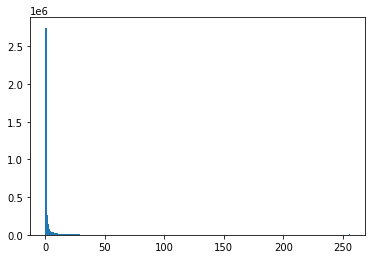

In [78]:


plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib.pyplot as plt

plt.style.use('ggplot')

data = np.random.normal(0, 1, 10000000)
np.var(data)

plt.hist(data, bins=60)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

k_vals = []; #s_vals = [];
taus = []
s_vals = []



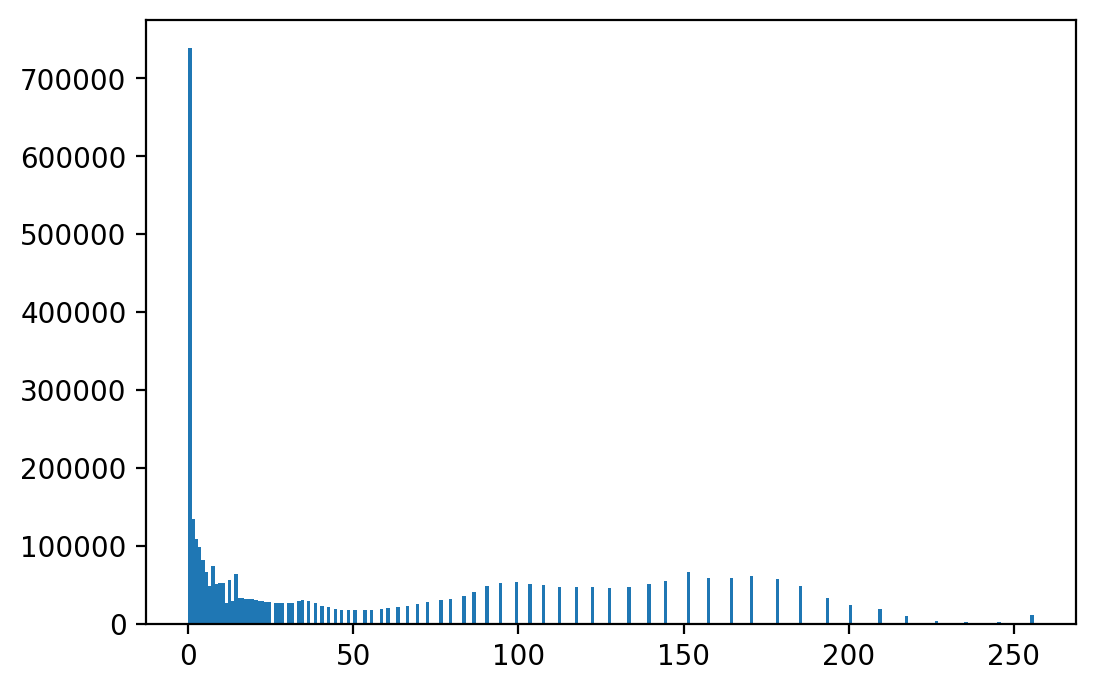

In [178]:
gamma_image = adjust_gamma(img, gamma = 0.1)
plt.figure(dpi = 200)
plt.hist(gamma_image.ravel(),256,[0,256])
plt.show()

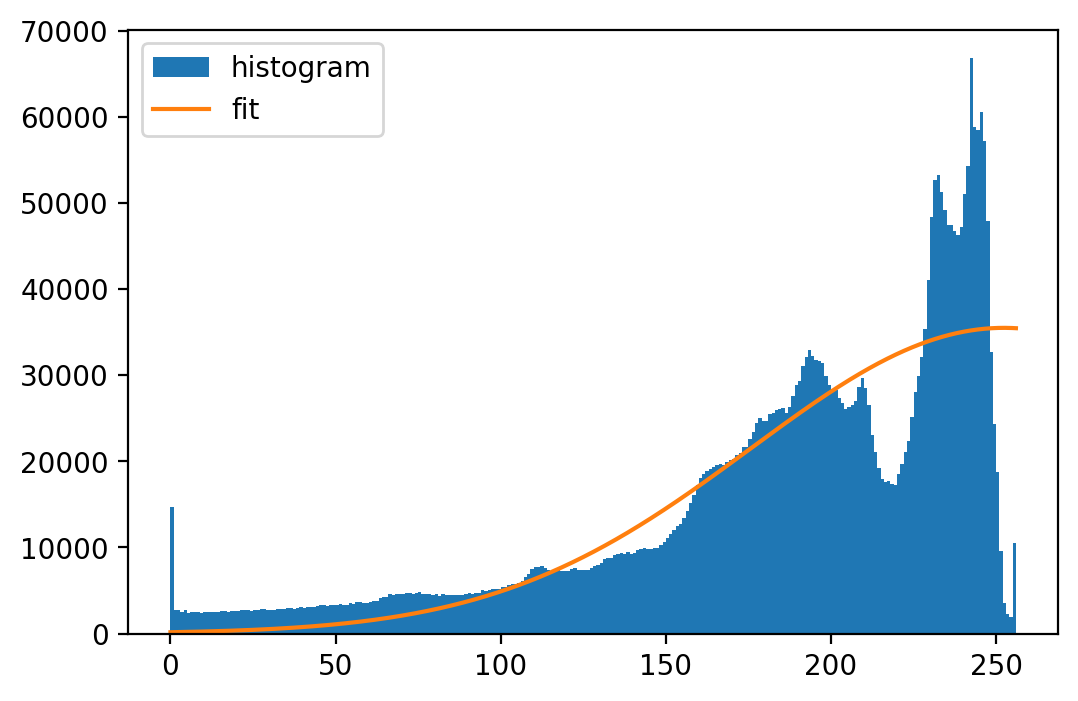

In [174]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
    
# x = np.random.normal(10, 5, size=10000)


# plt.hist()
# plt.show()




bin_heights, bin_borders, _ = plt.hist(gamma_image.ravel(),256,[0,256], label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit')
plt.legend()

In [210]:

# k_1 = kurtosis(gamma_image.ravel())
# print(k_1)

k_vals = []
taus = []
r = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] # 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
for gamma in r:
    gamma_image = adjust_gamma(img, gamma = gamma)
    # hist = np.histogram(gamma_image.ravel())
    # print(hist)

    k = kurtosis(gamma_image.ravel())
    tau = (k - k_1) / (gamma - 1)
    # s = skew(gamma_image.ravel())
    k_vals.append(k)
    taus.append(tau)
    # s_vals.append(s)

In [190]:
k_vals

[-0.22787951595271982,
 -1.2211570581214812,
 -1.270233908163273,
 -1.0884742950741724,
 -0.81100375023754,
 -0.487813711901111,
 -0.14121254820847717,
 0.22599514914735197,
 0.6008899131526233,
 5.160931144883442,
 10.693070218558956,
 18.42280181046685,
 28.471710767168272,
 40.438752149298864,
 53.59640454054649,
 67.18542775989951,
 80.87653575072163,
 94.04961522630288,
 106.36708982561338,
 117.9019539595445,
 128.3101877309421,
 137.8731358572542,
 146.66546344934602]

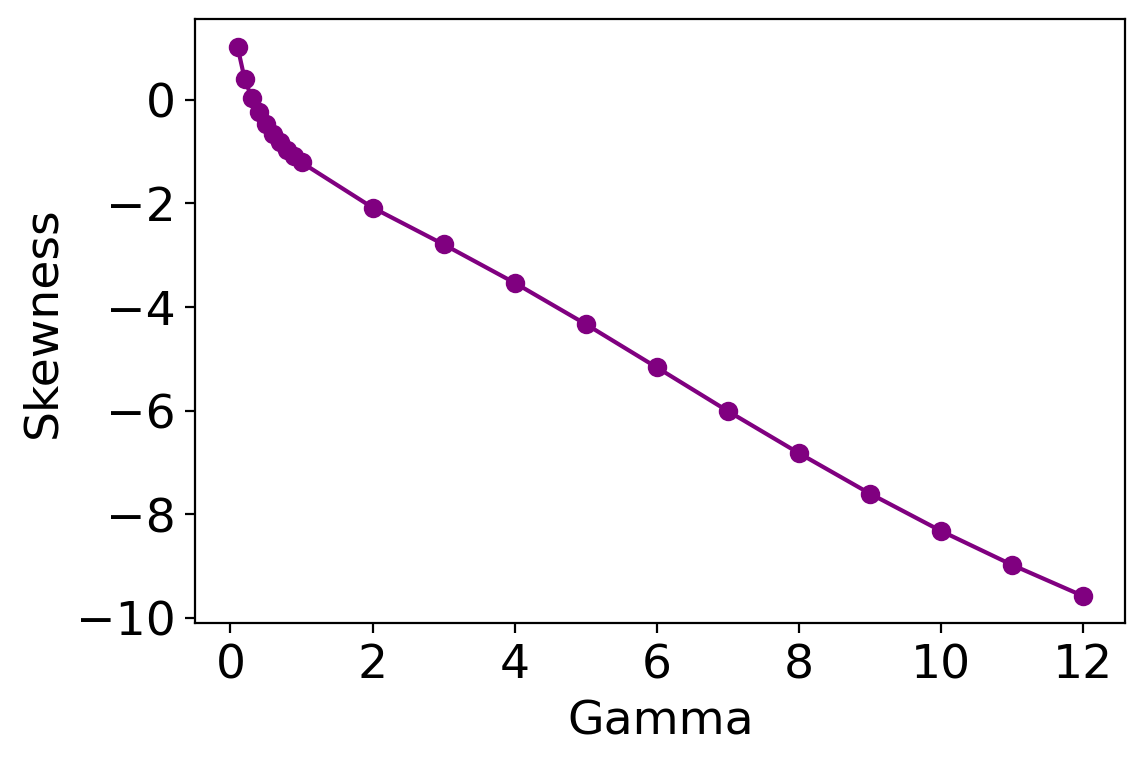

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.linspace(0, 5, 10) # [0, 0.55, 1.11, 1.66, 2.22, 2.77, 3.33, 3.88, 4.44, 5]
# y = np.exp(x)  # [1, 1.74, 3.03, 5.29, 9.22, 16.08, 28.03, 48.85, 85.15, 148.41]

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = s_vals

plt.figure(dpi = 200)
plt.plot(x, y, color = 'purple', marker = 'o')
plt.xlabel('Gamma', fontsize = 17)
plt.ylabel('Skewness', fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

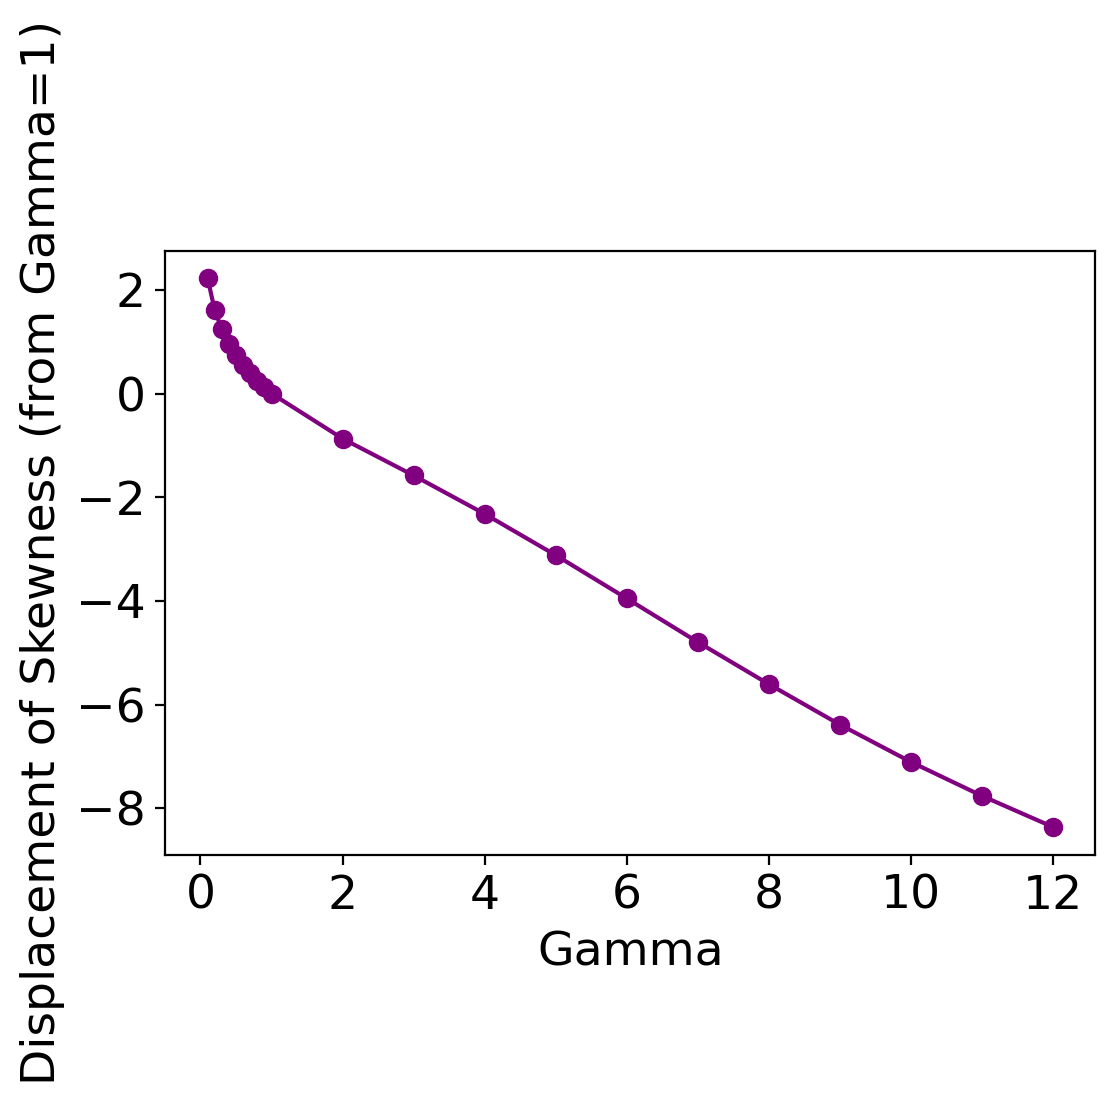

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.linspace(0, 5, 10) # [0, 0.55, 1.11, 1.66, 2.22, 2.77, 3.33, 3.88, 4.44, 5]
# y = np.exp(x)  # [1, 1.74, 3.03, 5.29, 9.22, 16.08, 28.03, 48.85, 85.15, 148.41]

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = s_vals

mean_displacement = np.array(s_vals) - y[9]

plt.figure(dpi = 200)
plt.plot(x, mean_displacement, color = 'purple', marker = 'o')
plt.xlabel('Gamma', fontsize = 17)
plt.ylabel('Displacement of Skewness (from Gamma=1)', fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

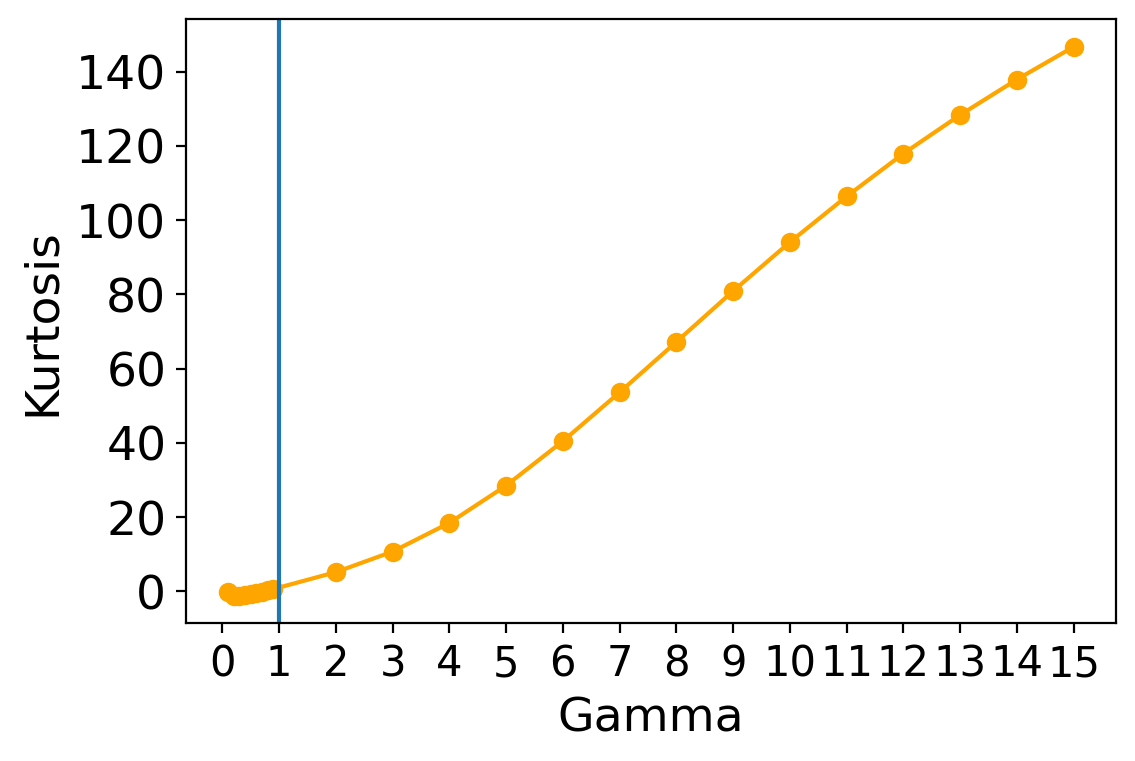

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.linspace(0, 5, 10) # [0, 0.55, 1.11, 1.66, 2.22, 2.77, 3.33, 3.88, 4.44, 5]
# y = np.exp(x)  # [1, 1.74, 3.03, 5.29, 9.22, 16.08, 28.03, 48.85, 85.15, 148.41]

x = r #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = k_vals

plt.figure(dpi = 200)
plt.plot(x, y, color = 'orange', marker = 'o')
xcoords = [1.0]
for xc in xcoords:
    plt.axvline(x=xc)
    
plt.xlabel('Gamma', fontsize = 17)
plt.ylabel('Kurtosis', fontsize = 17)
plt.xticks([0, 1] + r[9:], fontsize = 15)
plt.yticks(fontsize = 17)
plt.show()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [208]:
r

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15]

In [209]:
taus

[]

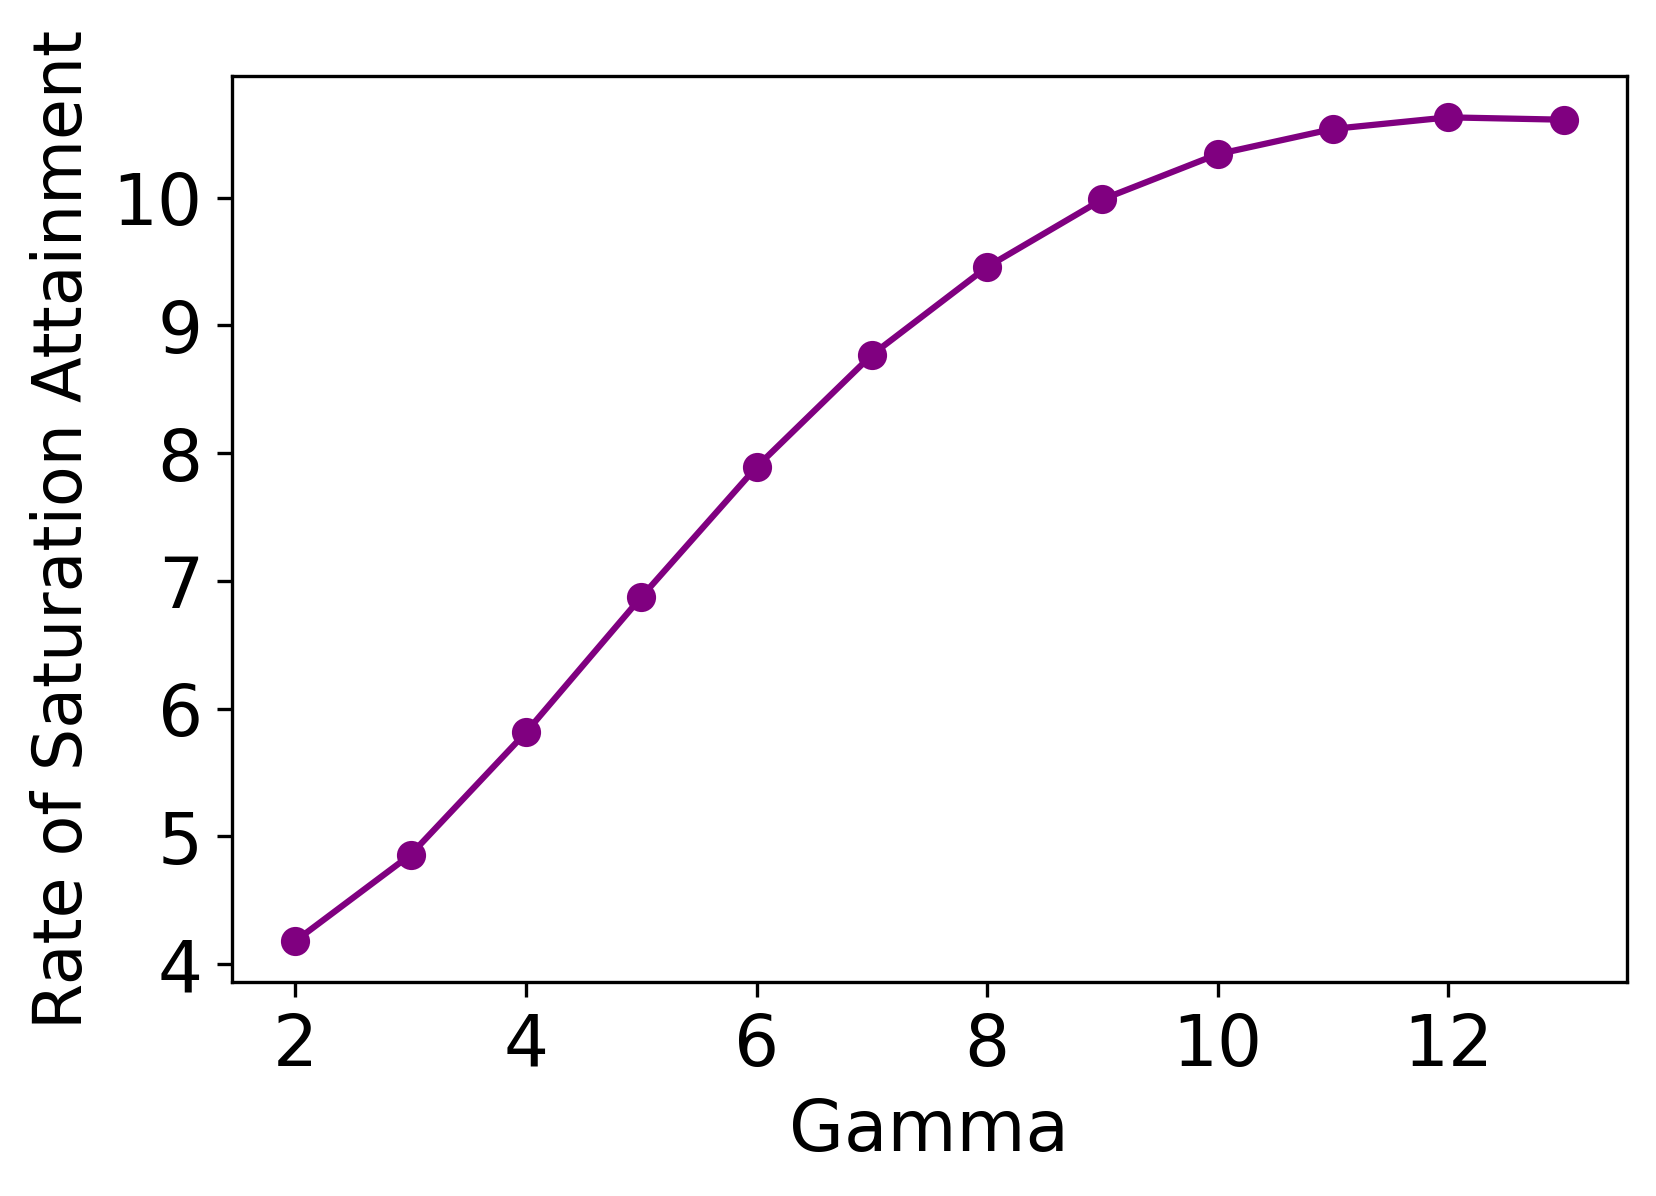

In [216]:
x = r[:-2] #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = taus[:-2] #taus

plt.figure(dpi = 300)
plt.plot(x, y, color = 'purple', marker = 'o')
plt.xlabel('Gamma', fontsize = 17)
plt.ylabel('Rate of Saturation Attainment', fontsize = 16)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

In [128]:
taus

[4.181166809849323,
 4.856652941762419,
 5.814345825144244,
 6.872986608033538,
 7.891797562852949,
 8.769440034252062,
 9.457951917837914,
 9.987096426960939,
 10.341094543474306,
 10.538732549057926,
 10.62928996586458]

In [129]:
k_vals

[5.160931144883442,
 10.693070218558956,
 18.42280181046685,
 28.471710767168272,
 40.438752149298864,
 53.59640454054649,
 67.18542775989951,
 80.87653575072163,
 94.04961522630288,
 106.36708982561338,
 117.9019539595445]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 10) # [0, 0.55, 1.11, 1.66, 2.22, 2.77, 3.33, 3.88, 4.44, 5]
y = np.exp(x)  # [1, 1.74, 3.03, 5.29, 9.22, 16.08, 28.03, 48.85, 85.15, 148.41]

plt.plot(x, y)
plt.show()

0.9797643350341194

-1.2140543217653281

In [273]:
img_rgb = read_img('/Users/hariharan/Desktop/pixels.png')

In [312]:
gamma_image = adjust_gamma(img_rgb, gamma = 1.)
gray = cv2.cvtColor(gamma_image, cv2.COLOR_BGR2GRAY)

In [313]:
from skimage.feature import greycomatrix
glcm = greycomatrix(gray, list(range(0, 10)), [0, np.pi/4, np.pi/8, np.pi/16, np.pi, -np.pi/8, -np.pi/4, -np.pi/16], levels=256)

/Users/hariharan/hari_works/virtualenv/lib/python3.9/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


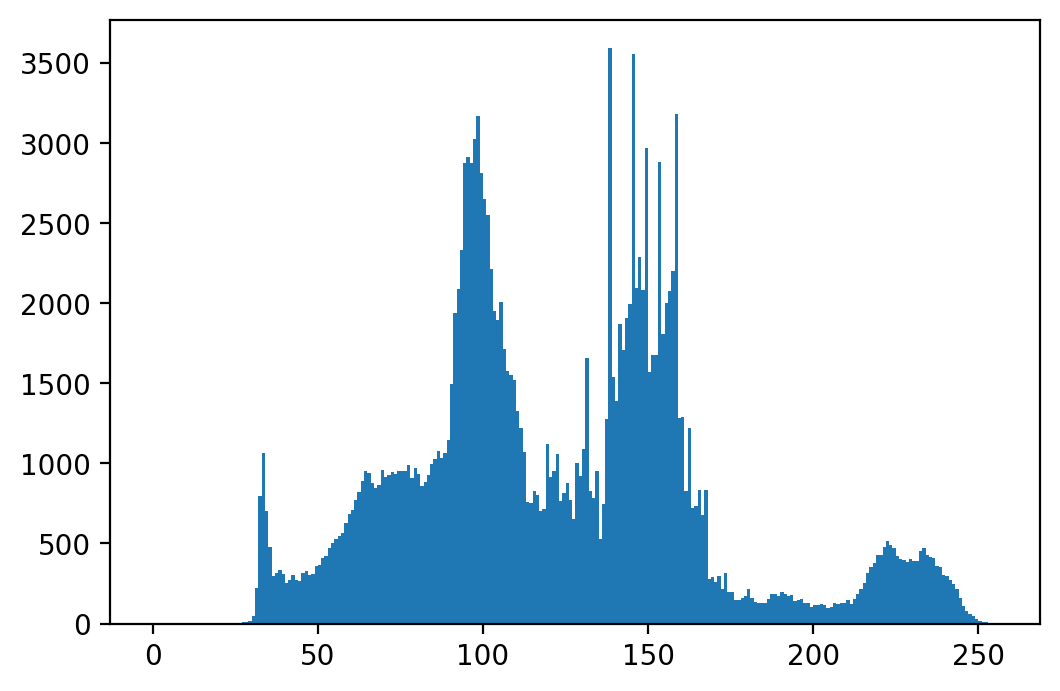

In [286]:
plt.figure(dpi = 200)
plt.hist(gray.ravel(),256,[0,256])
plt.show()

In [314]:
glcm.shape

(256, 256, 10, 8)

In [315]:
mat = glcm.reshape(256, 256, -1).sum(axis = -1)

In [316]:
mat

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 50, 12,  6],
       [ 0,  0,  0, ..., 12, 30,  0],
       [ 0,  0,  0, ...,  2,  0,  8]], dtype=uint64)

In [317]:
mat[mat > 1000] = 1000

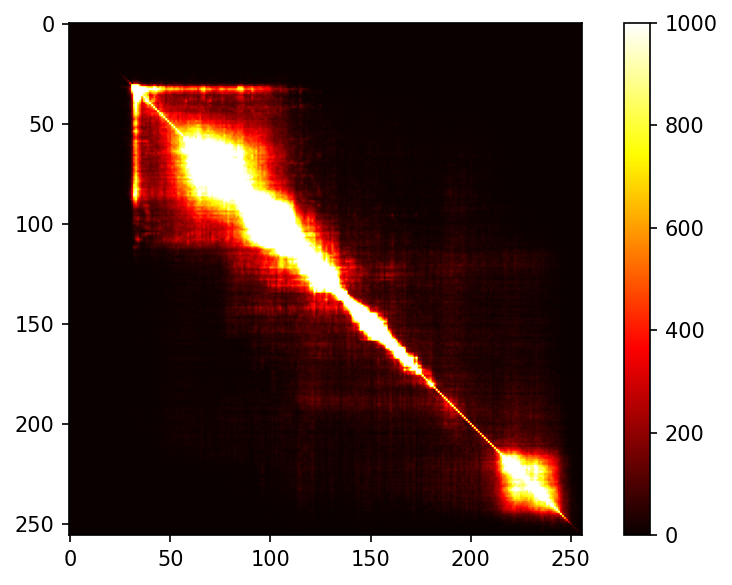

(None, None)

In [318]:
# Some visualization
plt.figure(dpi = 150) #figsize=(8, 8))
plt.imshow(mat, cmap='hot'), plt.colorbar()
plt.tight_layout(), plt.show()

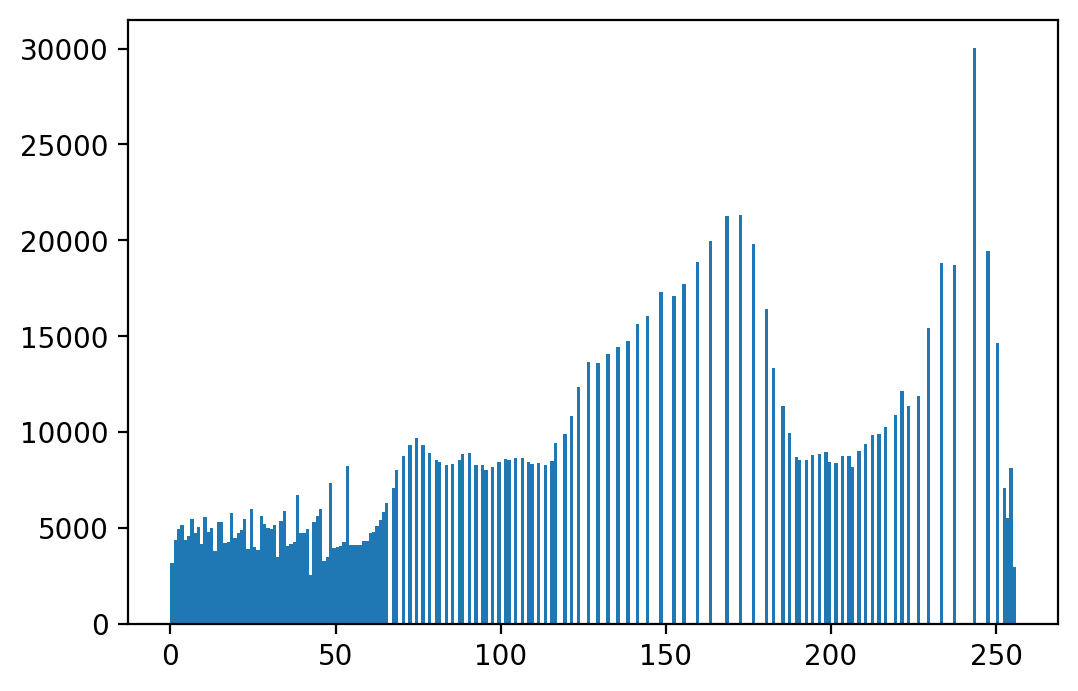

In [108]:
gamma_image = adjust_gamma(img, gamma = 1.0)

gray = cv2.cvtColor(gamma_image, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)

# grad_x = cv2.Sobel(gamma_image, cv2.CV_64F, 1, 0, ksize=3)
# grad_y = cv2.Sobel(gamma_image, cv2.CV_64F, 0, 1, ksize=3)

# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)

# grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# img_blur = cv2.GaussianBlur(gamma_image, (3,3), 0)
# sobel = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge 

# laplacian = cv2.Laplacian(gamma_image, None, cv2.CV_8U, 1, 1, 0, cv2.BORDER_DEFAULT);
plt.figure(dpi = 200)
plt.hist(equ.ravel(),256,[0,256])
plt.show()
# imshow(edges)